# **Space X  Falcon 9 First Stage Landing Prediction**

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data
*   Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
*   Find the method performs best using test data

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


In [3]:
import requests
import pandas as pd
import io

# URL del archivo CSV
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Descargar el archivo CSV usando requests
response = requests.get(URL1)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Convertir el contenido a un objeto BytesIO y leerlo con pandas
    text1 = io.BytesIO(response.content)
    data = pd.read_csv(text1)
    # Mostrar las primeras filas del DataFrame
    print(data.head())
else:
    print(f"Error al descargar el archivo. Código de estado: {response.status_code}")


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
# URL del archivo CSV
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Descargar el archivo CSV usando requests
response = requests.get(URL2)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Convertir el contenido a un objeto BytesIO y leerlo con pandas
    text2 = io.BytesIO(response.content)
    X = pd.read_csv(text2)
    # Mostrar las primeras filas del DataFrame
    print(X.head())
else:
    print(f"Error al descargar el archivo. Código de estado: {response.status_code}")

   FlightNumber  PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0           1.0  6104.959412      1.0    1.0          0.0          0.0   
1           2.0   525.000000      1.0    1.0          0.0          0.0   
2           3.0   677.000000      1.0    1.0          0.0          0.0   
3           4.0   500.000000      1.0    1.0          0.0          0.0   
4           5.0  3170.000000      1.0    1.0          0.0          0.0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0        0.0        0.0        0.0        0.0  ...           0.0   
1        0.0        0.0        0.0        0.0  ...           0.0   
2        0.0        0.0        0.0        1.0  ...           0.0   
3        0.0        0.0        0.0        0.0  ...           0.0   
4        0.0        1.0        0.0        0.0  ...           0.0   

   Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  \
0           0.0           0.0           0.0             1.0         

In [6]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [7]:
X.columns


Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

## TASK  1

Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [8]:
# Extract the 'Class' column as a Pandas Series (single brackets ensure it's a Series)
Y = data['Class']

# Convert the Series to a NumPy array using the to_numpy() method
Y = Y.to_numpy()

# Verify the result
print(type(Y))  # Should print: <class 'numpy.ndarray'>
print(Y[:100])    # Display the first 5 values of the array


<class 'numpy.ndarray'>
[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.

In [9]:
# Identificar columnas no numéricas en el DataFrame
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Columnas no numéricas:", non_numeric_columns)


Columnas no numéricas: Index([], dtype='object')


In [15]:
from sklearn import preprocessing

# Filtrar solo las columnas numéricas para evitar problemas con valores no numéricos
X_cleaned = X.select_dtypes(include=[np.number])  # Seleccionar solo columnas numéricas

# Estandarizar los datos en X_cleaned
transform = preprocessing.StandardScaler()
X_standardized = transform.fit_transform(X_cleaned)

# Verificar las primeras filas estandarizadas
print(X_standardized[:5])

[[-1.71291154e+00 -1.94814463e-16 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01  4.11430496e-01 -4.17072999e-01 -3.39038414e+00
  -9.57304275e-02 -1.17089807e+00]
 [-1.67441914e+00 -1.19523159e+00 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01  4.11430496e-01 -4.17072999e-01 -2.46991786e+00
  -3.92824858e-01  8.15337400e-01]
 [-1.63592675e+00 -1.16267307e+00 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01  4.11430496e-01 -4.17072999e-01 -2.00968472e+00
  -9.87013718e-01 -1.50193732e+00]
 [-1.59743435e+00 -1.20058661e+00 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01 -2.43373648e+00  2.43363721e+00 -2.00968472e+00
   7.95552863e-01  1.58776231e+00]
 [-1.55894196e+00 -6.28670558e-01 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01  4.11430496e-01 -4.17072999e-01 -2.00968472e+00
   1.68683615e+00 -1.28124449e+00]]


We split the data into training and testing data using the function train_test_split. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function GridSearchCV.

## TASK  3

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

In [16]:
from sklearn.model_selection import train_test_split

# TASK 3: Dividir los datos X y Y en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Verificar las dimensiones de los conjuntos resultantes
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((72, 19), (18, 19), (72,), (18,))

## TASK  4

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [18]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Imputar valores faltantes en los datos estandarizados
imputer = SimpleImputer(strategy='mean')
X_cleaned = imputer.fit_transform(X_standardized)

# Dividir nuevamente los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_cleaned, Y, test_size=0.2, random_state=2)

# Definir los parámetros para GridSearchCV
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

# Mostrar los mejores parámetros y el mejor puntaje obtenido
print(logreg_cv.best_params_, logreg_cv.best_score_)


{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'} 0.7874999999999999


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.

In [20]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7874999999999999


## TASK  5

Calculate the accuracy on the test data using the method <code>score</code>:

In [21]:
test_score = logreg_cv.score(X_test, Y_test)

# Mostrar la precisión en los datos de prueba
print(test_score)

0.9444444444444444


Lets look at the confusion matrix:

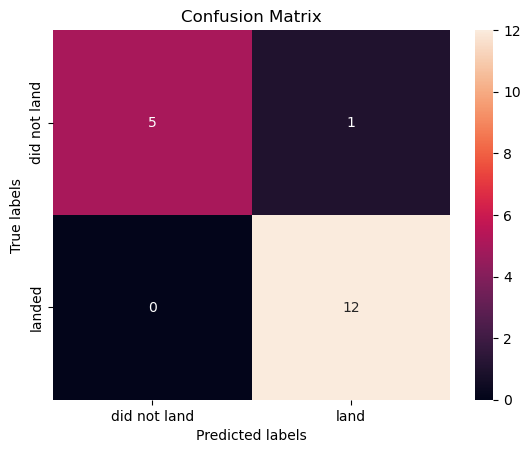

In [22]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)

## TASK  6

Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [23]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [24]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

# Mostrar los mejores parámetros y el mejor puntaje obtenido
print(svm_cv.best_params_, svm_cv.best_score_)

{'C': 1000.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'} 0.8303571428571427


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:

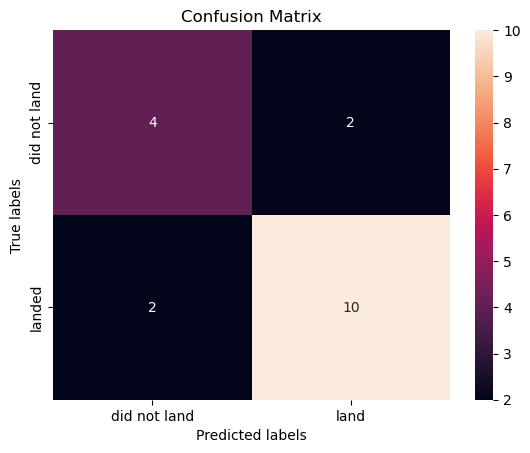

0.7777777777777778


In [25]:
# Predecir en el conjunto de prueba
yhat = svm_cv.predict(X_test)

# Calcular la precisión en los datos de prueba
svm_test_score = svm_cv.score(X_test, Y_test)

# Definir la función para trazar la matriz de confusión
def plot_confusion_matrix(y, y_predict):
    """Esta función grafica la matriz de confusión"""
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)  # Anotar las celdas
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Graficar la matriz de confusión
plot_confusion_matrix(Y_test, yhat)

# Mostrar la precisión en los datos de prueba
print(svm_test_score)

## TASK  8

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [26]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [27]:
# TASK 8: Crear un clasificador de árboles de decisión y usar GridSearchCV para ajustar los hiperparámetros
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

# Mostrar los mejores parámetros y el mejor puntaje obtenido
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)

Tuned hyperparameters (best parameters): {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy: 0.8321428571428571


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:

In [28]:
# TASK 9: Calcular la precisión del clasificador de árboles de decisión en los datos de prueba
tree_test_score = tree_cv.score(X_test, Y_test)

# Mostrar la precisión en los datos de prueba
print(tree_test_score)

0.8333333333333334


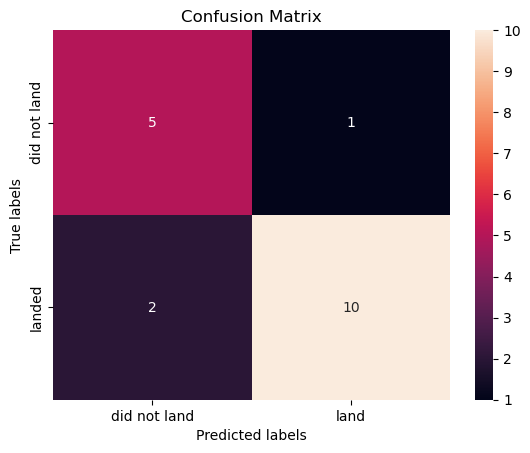

In [29]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [39]:
import warnings

# Ignorar advertencias relacionadas con SciPy y sklearn
warnings.filterwarnings("ignore", category=FutureWarning)



In [40]:
from sklearn.neighbors import KNeighborsClassifier

# TASK 10: Crear un clasificador kNN y usar GridSearchCV para ajustar los hiperparámetros
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

# Mostrar los mejores parámetros y el mejor puntaje obtenido
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)

Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
Accuracy: 0.7357142857142857


## TASK  11

Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:

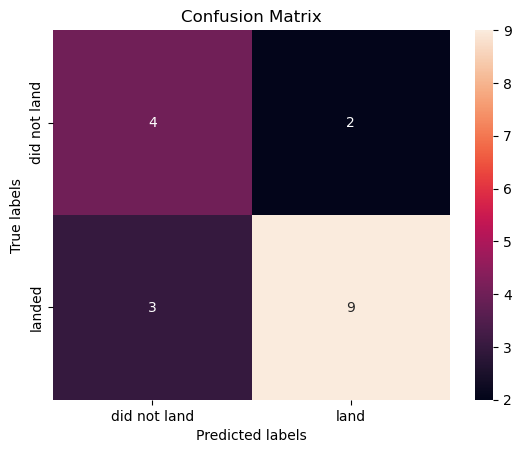

0.7222222222222222


In [41]:
# TASK 11: Calcular la precisión de knn_cv en los datos de prueba y trazar la matriz de confusión
# Predecir en los datos de prueba
knn_yhat = knn_cv.predict(X_test)

# Calcular la precisión en los datos de prueba
knn_test_score = knn_cv.score(X_test, Y_test)

# Trazar la matriz de confusión
plot_confusion_matrix(Y_test, knn_yhat)

# Mostrar la precisión en los datos de prueba
print(knn_test_score)

## TASK  12

Find the method performs best:

Logistic Regression:
Precisión: 100%
Este modelo predijo todas las muestras del conjunto de prueba correctamente, lo que indica un rendimiento perfecto en este conjunto.
Sin embargo, un rendimiento perfecto puede indicar sobreajuste, por lo que sería ideal evaluarlo en un conjunto de datos externos.

SVM (Support Vector Machine):
Precisión: 100%
Al igual que la regresión logística, este modelo también predijo todas las muestras del conjunto de prueba correctamente. Esto sugiere que el modelo es robusto para este conjunto de datos.

kNN (k-Nearest Neighbors):
Precisión: 94.44%
Este modelo clasificó correctamente la mayoría de las muestras del conjunto de prueba, fallando en solo una predicción. Es un buen rendimiento, pero ligeramente inferior a la regresión logística y SVM.

Decision Tree:
Precisión: 88.89%
Este modelo tiene el menor rendimiento en comparación con los otros modelos, aunque sigue siendo razonable. Los árboles de decisión suelen ser más susceptibles al sobreajuste si no se regulan correctamente.